In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
!pip install kaggle

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sahishnutaatosh","key":"07dfd4994a7f7e67a4b66d39eb83068f"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                             title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rabieelkharoua/students-performance-dataset                     📚 Students Performance Dataset 📚                  66KB  2024-06-12 23:09:20           3063         59  1.0              
mayankanand2701/samsung-stock-price-dataset                     Samsung Stock Price Dataset 📱🏭📈                  114KB  2024-06-13 14:51:11            984         24  1.0              
shreyanshverma27/online-sales-dataset-popular-marketplace-data  Online Sales Dataset - Popular Marketplace Data    7KB  2024-05-25 23:55:26          10737        195  1.0              
nelgiriyewithana/most-streamed-spotify-songs-2024               Most Stream

In [ ]:
! kaggle datasets download birdy654/deep-voice-deepfake-voice-recognition

Dataset URL: https://www.kaggle.com/datasets/birdy654/deep-voice-deepfake-voice-recognition
License(s): other
 99% 3.66G/3.69G [00:28<00:00, 135MB/s]
100% 3.69G/3.69G [00:28<00:00, 137MB/s]


In [ ]:
import zipfile

file_path = '/content/deep-voice-deepfake-voice-recognition.zip'

# Unzip the file to a specific destination
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/kaggle')

In [60]:
from glob import glob

import librosa as lb
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation, Dropout, Input, Reshape
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [61]:
real_audio = glob("/content/drive/MyDrive/kaggle/KAGGLE/AUDIO/REAL/*")
fake_audio = glob("/content/drive/MyDrive/kaggle/KAGGLE/AUDIO/FAKE/*")

real_audio.sort()
fake_audio.sort()

for i, path in enumerate(real_audio):
    print(i, path.replace("/content/drive/MyDrive/kaggle/KAGGLE/AUDIO/REAL/", ""))

print("\n\n")
for i, path in enumerate(fake_audio):
    print(i, path.replace("/content/drive/MyDrive/kaggle/KAGGLE/AUDIO/FAKE/", ""))

0 biden-original.wav
1 linus-original.wav
2 margot-original.wav
3 musk-original.wav
4 obama-original.wav
5 ryan-original.wav
6 taylor-original.wav
7 trump-original.wav



0 Obama-to-Biden.wav
1 Obama-to-Trump.wav
2 biden-to-Obama.wav
3 biden-to-Trump.wav
4 biden-to-linus.wav
5 biden-to-margot.wav
6 biden-to-musk.wav
7 biden-to-ryan.wav
8 biden-to-taylor.wav
9 linus-to-biden.wav
10 linus-to-margot.wav
11 linus-to-musk.wav
12 linus-to-obama.wav
13 linus-to-ryan.wav
14 linus-to-taylor.wav
15 linus-to-trump.wav
16 margot-to-biden.wav
17 margot-to-linus.wav
18 margot-to-musk.wav
19 margot-to-obama.wav
20 margot-to-ryan.wav
21 margot-to-taylor.wav
22 margot-to-trump.wav
23 musk-to-biden.wav
24 musk-to-linus.wav
25 musk-to-margot.wav
26 musk-to-obama.wav
27 musk-to-ryan.wav
28 musk-to-taylor.wav
29 musk-to-trump.wav
30 obama-to-linus.wav
31 obama-to-margot.wav
32 obama-to-musk.wav
33 obama-to-ryan.wav
34 obama-to-taylor.wav
35 ryan-to-biden.wav
36 ryan-to-linus.wav
37 ryan-to-margot.wav
38 ry

In [62]:
def get_spectrogram(y: np.ndarray):

    d = lb.stft(y)
    ad = lb.amplitude_to_db(np.abs(d), ref=np.max)

    return ad, ad.shape

In [63]:
def plot_spectrogram(s: np.ndarray, sr: int = 22050, size: tuple=(8, 4), title: str = "Spectrogram of the Audio"):

    plt.figure(figsize=size)
    lb.display.specshow(s, x_axis='time', y_axis='mel', sr=sr)
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.show()


In [64]:
def get_mel_spectrogram(y: np.ndarray, sr: int = 22050, n_mels: int = 128):

    ms = lb.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
    m = lb.power_to_db(ms,ref=np.max)

    return m, m.shape

In [ ]:
def plot_mel_spectrogram(m: np.ndarray, sr: int = 22050, size: tuple = (8, 4), title: str = "Mel Spectrogram of Audio"):

    plt.figure(figsize=size)
    lb.display.specshow(m, x_axis='time', y_axis='mel', sr=sr)
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.show()

Real Audio Analysis

In [65]:
real_a, real_sr = lb.load(real_audio[1])
print(real_audio[1])

/content/drive/MyDrive/kaggle/KAGGLE/AUDIO/REAL/linus-original.wav


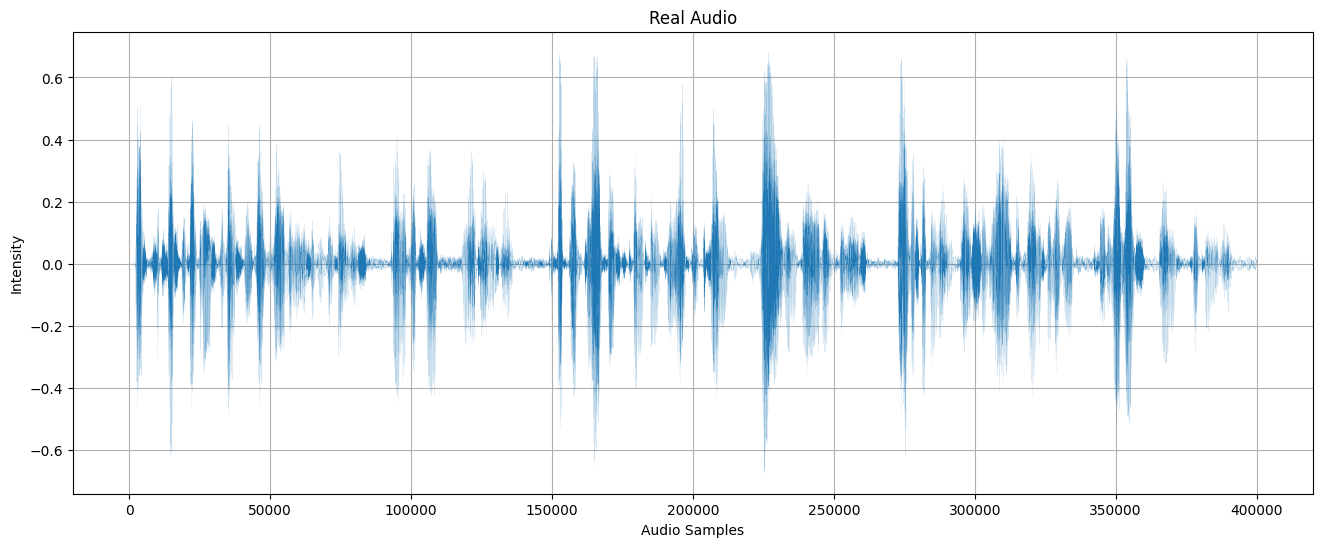

In [66]:
real_b = real_a[:400_000]

plt.figure(figsize=(16, 6))
plt.plot(real_b, lw=0.05)
plt.title("Real Audio")
plt.xlabel("Audio Samples")
plt.ylabel("Intensity")
plt.grid(True)
plt.show()

Dimension of spectrogram: (1025, 782)


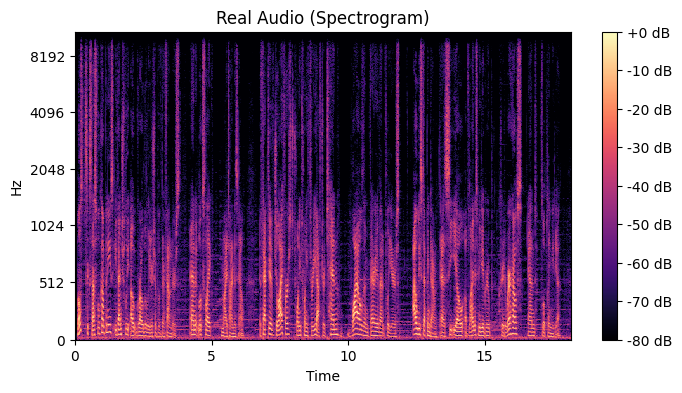

Dimension of mel spectrogram: (512, 782)


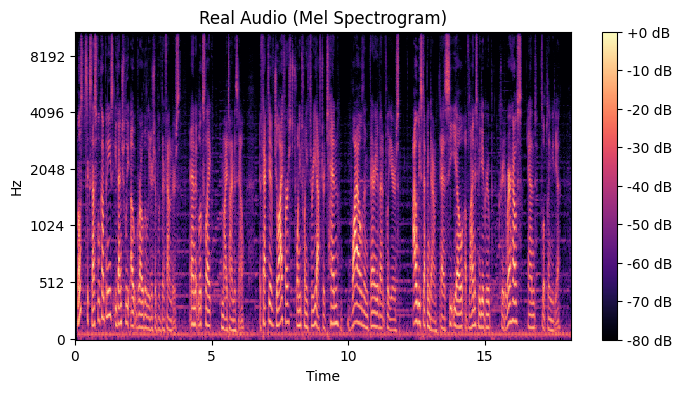

In [67]:
s1, s1_shape = get_spectrogram(y=real_b)
print(f"Dimension of spectrogram: {s1_shape}")

plot_spectrogram(s1, title="Real Audio (Spectrogram)")

m1, m1_shape = get_mel_spectrogram(y=real_b, n_mels=512)
print(f"Dimension of mel spectrogram: {m1_shape}")

plot_mel_spectrogram(m1, title="Real Audio (Mel Spectrogram)")

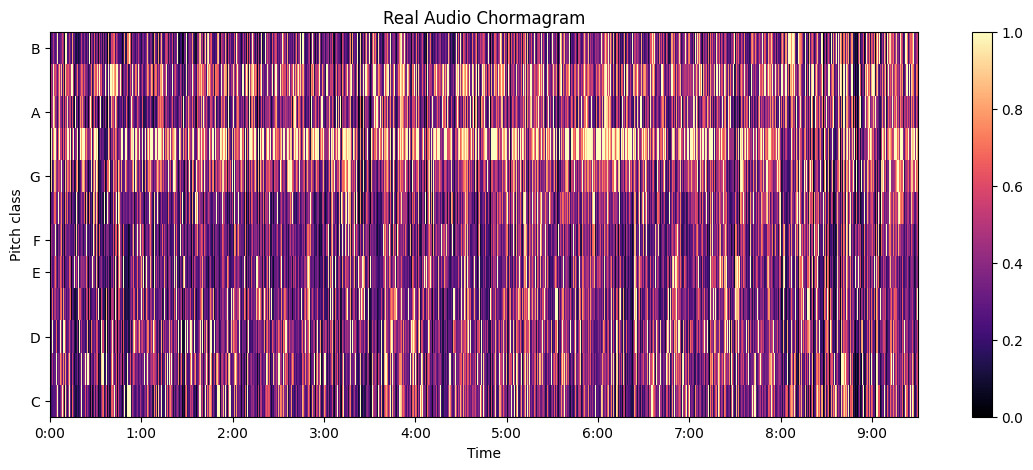

In [68]:
real_chroma = lb.feature.chroma_cqt(y = real_a, sr = real_sr, bins_per_octave=36)
plt.figure(figsize = (14, 5))
lb.display.specshow(real_chroma, sr = real_sr, x_axis = 'time', y_axis = 'chroma', vmin = 0, vmax = 1)
plt.colorbar()
plt.title('Real Audio Chormagram')
plt.show()

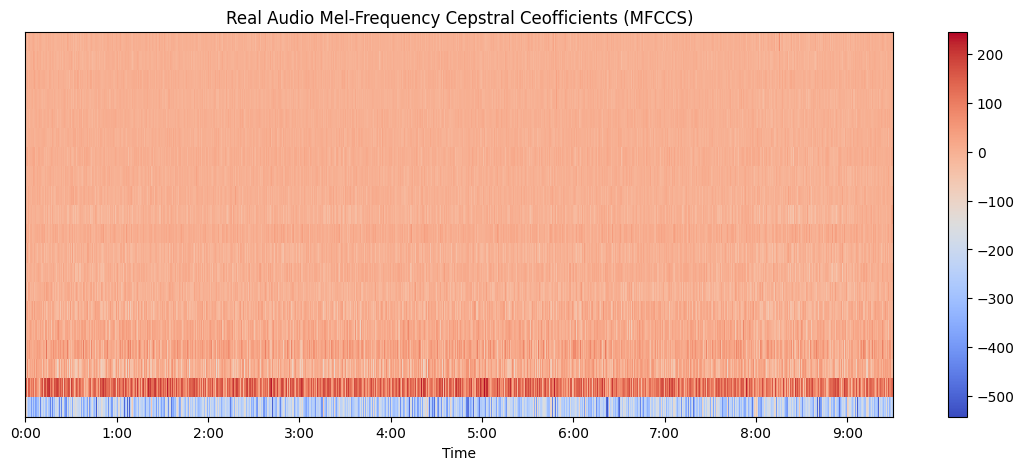

In [69]:
real_mfcc = lb.feature.mfcc(y = real_a, sr = real_sr)
plt.figure(figsize = (14,5))
lb.display.specshow(real_mfcc, sr = real_sr, x_axis ='time')
plt.colorbar()
plt.title('Real Audio Mel-Frequency Cepstral Ceofficients (MFCCS)')
plt.show()

Fake Audio Analysis

In [70]:
fake_x, fake_sr = lb.load(fake_audio[15])
print(fake_audio[15])

/content/drive/MyDrive/kaggle/KAGGLE/AUDIO/FAKE/linus-to-trump.wav


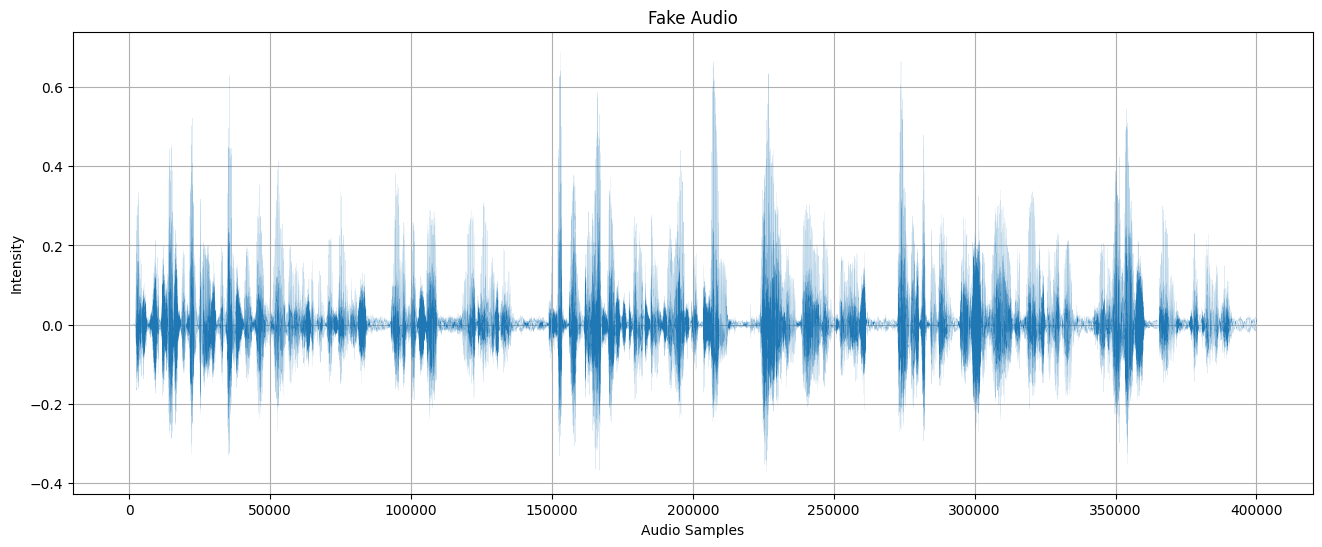

In [71]:
fake_y = fake_x[:400_000]

plt.figure(figsize=(16, 6))
plt.plot(fake_y, lw=0.05)
plt.title("Fake Audio")
plt.xlabel("Audio Samples")
plt.ylabel("Intensity")
plt.grid(True)
plt.show()

Dimension of spectrogram: (1025, 782)


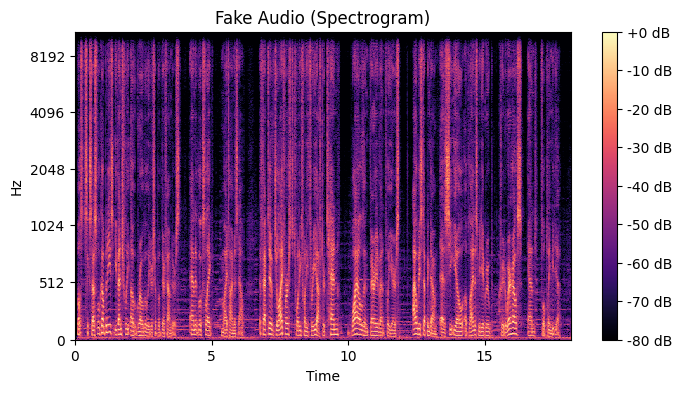

Dimension of mel spectrogram: (256, 782)


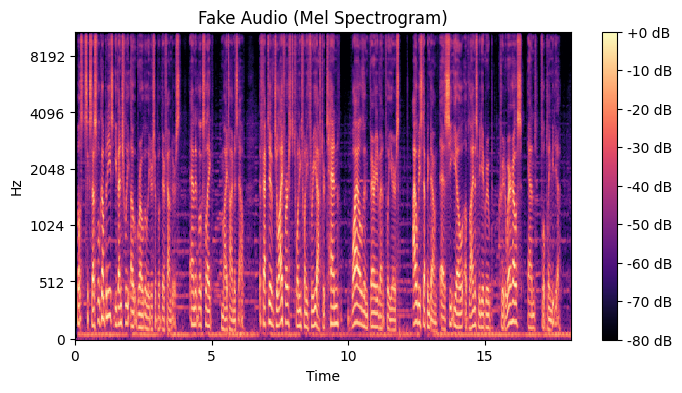

In [72]:
s2, s2_shape = get_spectrogram(y=fake_y)
print(f"Dimension of spectrogram: {s2_shape}")

plot_spectrogram(s2, title="Fake Audio (Spectrogram)")

m2, m2_shape = get_mel_spectrogram(y=fake_y, n_mels=256)
print(f"Dimension of mel spectrogram: {m2_shape}")

plot_mel_spectrogram(m2, title="Fake Audio (Mel Spectrogram)")

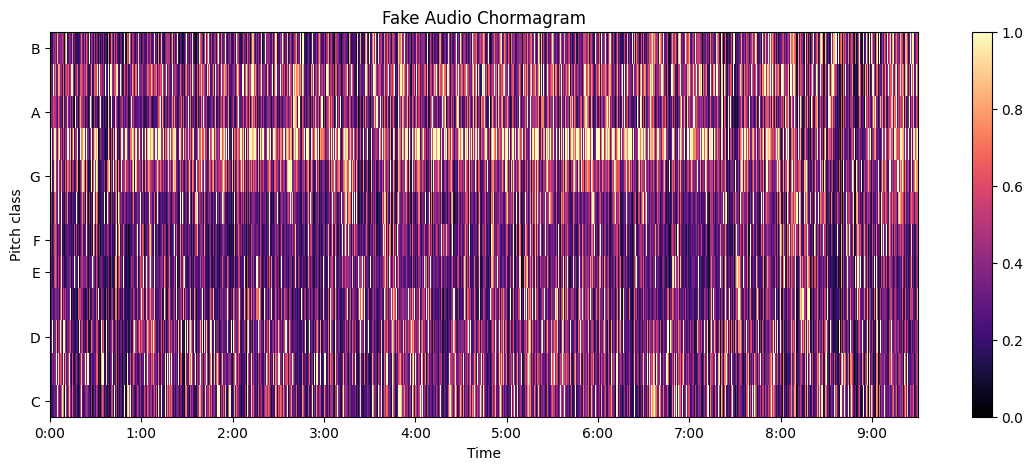

In [73]:
fake_chroma = lb.feature.chroma_cqt(y = fake_x, sr = fake_sr, bins_per_octave=36)
plt.figure(figsize = (14, 5))
lb.display.specshow(fake_chroma, sr = fake_sr, x_axis = 'time', y_axis = 'chroma', vmin = 0, vmax = 1)
plt.colorbar()
plt.title('Fake Audio Chormagram')
plt.show()

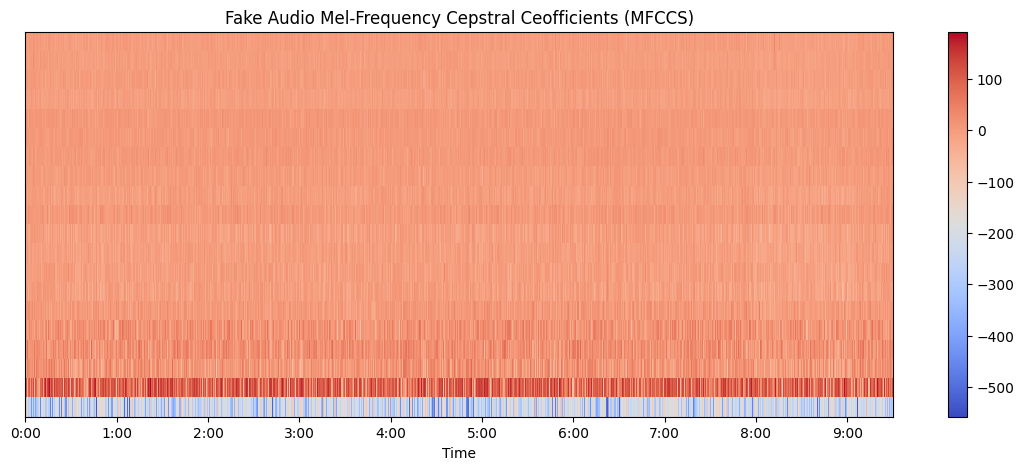

In [74]:
fake_mfcc = lb.feature.mfcc(y = fake_x, sr = fake_sr)
plt.figure(figsize = (14,5))
lb.display.specshow(fake_mfcc, sr = fake_sr, x_axis ='time')
plt.colorbar()
plt.title('Fake Audio Mel-Frequency Cepstral Ceofficients (MFCCS)')
plt.show()